In [1]:
import torch
import matplotlib.pyplot as plt
import config

import sys
sys.path.append(config.root_path)

from Trainer import Trainer
from util import *
from unets_classic import *
from MobileNetV2 import *

from membrane_dataset import *


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
in_channels            = 1
num_classes            = 1
info_dataset_resolution=256
info_dataset_image_size=256
info_dataset_batch_size=8
train_loader, test_loader, val_loader = get_membrane_datasets(dataset_dir=config.dataset_path, 
                                                resolution=info_dataset_resolution, 
                                                batch_size=info_dataset_batch_size, 
                                                augmented=True)

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])


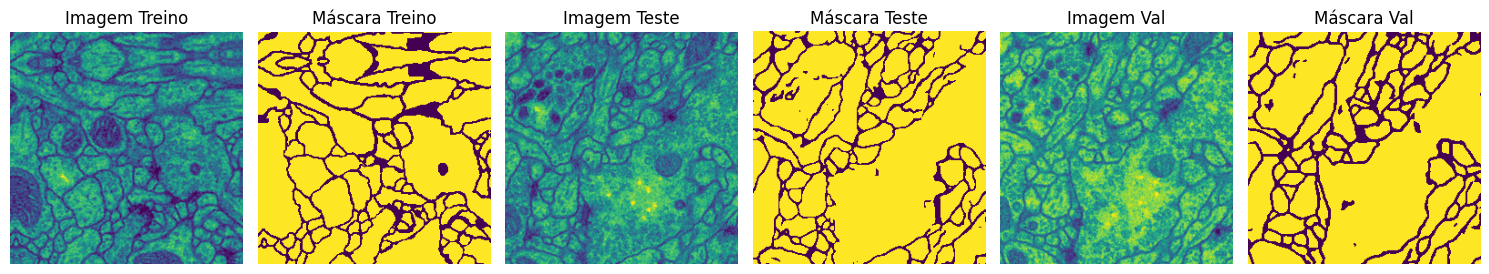

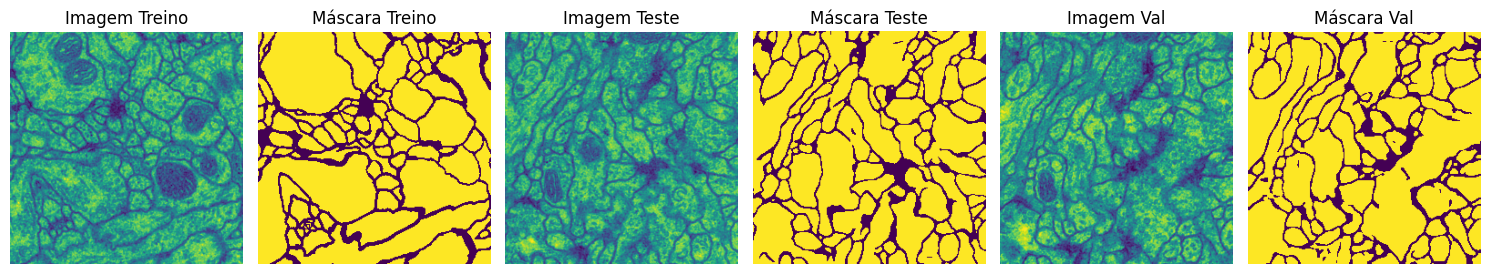

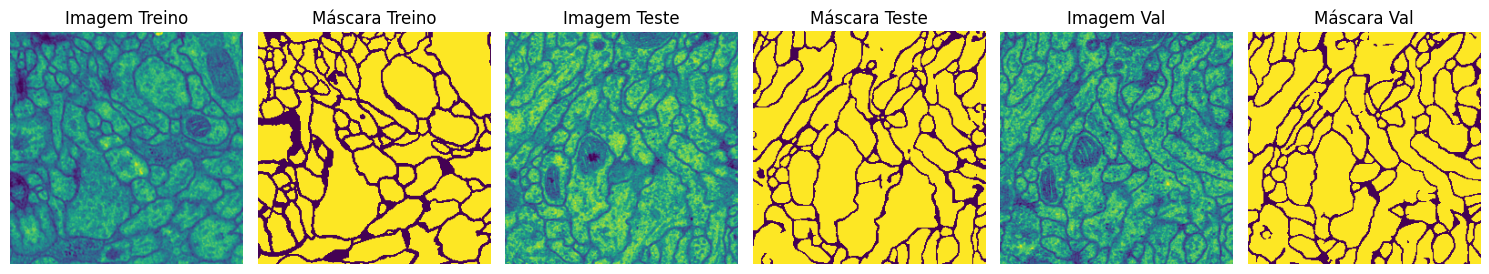

In [4]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [5]:
epochs       = 300
model_name   = 'u-net-classic-aug'
path         = 'u-net-CIARP'

In [6]:
unet_size = 'P'
model = getUnetClassic(unet_size, in_channels=in_channels, out_channels=num_classes)
model_filename = f'{model_name}-{unet_size}-epochs{epochs}.pth'
trainer = Trainer(model_filename, 
                  model_dir=path, 
                  info={'u-net_size':unet_size},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


Parando na época 45 por early stopping. 0.2065 Dice: 0.8780 mIoU: 0.7908 IoU: 0.7911 Precision: 0.8555 Recall: 0.9071 Q: 0.6943 Tempo total: 00:02:45 LR:0.000500

Melhor modelo:
 Epoch [25/300] - Loss: 0.1944 Val Loss: 0.1564 Dice: 0.8877 mIoU: 0.8055 IoU: 0.8058 Precision: 0.8718 Recall: 0.9063 Q: 0.7150 Tempo total: 00:01:32 LR:0.001000
Ultimo modelo:
 Epoch [45/300] - Loss: 0.1525 Val Loss: 0.2065 Dice: 0.8780 mIoU: 0.7908 IoU: 0.7911 Precision: 0.8555 Recall: 0.9071 Q: 0.6943 Tempo total: 00:02:45 LR:0.000500 FPS: 627.45
Saved as u-net-CIARP/u-net-classic-aug-P-epochs300.pth
u-net-CIARP/outputs/sample0-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample1-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample2-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample3-u-net-classic-aug-P-epochs300.png saved.
u-net-CIARP/outputs/sample4-u-net-classic-aug-P-epochs300.png saved.


In [ ]:

model = getDeepLabV3_MobileNetV2(num_classes, in_channels=in_channels)

model_name     = 'MobileNetV2'
path           = model_name
model_filename = f'{model_name}-Medetec-epochs{epochs}.pth'
trainer = MobileNetV2Trainer(model_filename, 
                  model_dir=path, 
                  info={'weights':'DEFAULT'},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 12647361
Parando na época 29 por early stopping. 0.4370 Dice: 0.4650 mIoU: 0.4201 IoU: 0.4196 Precision: 0.6262 Recall: 0.5047 Q: 0.1954 Tempo total: 00:01:59 LR:0.000500

Melhor modelo:
 Epoch [9/300] - Loss: 0.4672 Val Loss: 0.4402 Dice: 0.4724 mIoU: 0.4232 IoU: 0.4220 Precision: 0.6054 Recall: 0.5071 Q: 0.2000 Tempo total: 00:00:39 LR:0.001000
Ultimo modelo:
 Epoch [29/300] - Loss: 0.4616 Val Loss: 0.4370 Dice: 0.4650 mIoU: 0.4201 IoU: 0.4196 Precision: 0.6262 Recall: 0.5047 Q: 0.1954 Tempo total: 00:01:59 LR:0.000500 FPS: 950.10
Saved as MobileNetV2-t2/MobileNetV2-t2-Medetec-epochs300.pth
MobileNetV2-t2/outputs/sample0-MobileNetV2-t2-Medetec-epochs300.png saved.
MobileNetV2-t2/outputs/sample1-MobileNetV2-t2-Medetec-epochs300.png saved.
MobileNetV2-t2/outputs/sample2-MobileNetV2-t2-Medetec-epochs300.png saved.
MobileNetV2-t2/outputs/sample3-MobileNetV2-t2-Medetec-epochs300.png saved.
MobileNetV2-t2/outputs/sample4-MobileNetV2-t2-Medetec-epochs300.png saved.
